In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from collections import Counter


In [ ]:
# Exploratory Data Analysis-M12

# Creating Function to Count the words in a csv file


def count_words_in_csv(file_path, column=None):
    """
    Count words in a CSV file.

    Args:
        file_path (str): Path to the CSV file.
        column (str, optional): Column name to count words from.
                                If None, counts words from all text in the file.

    Returns:
        int: Total number of words.
    """
    df = pd.read_csv(file_path)

    if column:
        text_data = df[column].dropna().astype(str).str.cat(sep=" ")
    else:
        text_data = df.astype(str).apply(lambda x: " ".join(x), axis=1).str.cat(sep=" ")

    words = re.findall(r'\b\w+\b', text_data)
    return len(words)


def compare_word_counts(files, labels=None, column=None):
    """
    Compare word counts from multiple CSV files and plot bar chart.

    Args:
        files (list): List of CSV file paths.
        labels (list): Labels for each file (defaults to filenames).
        column (str, optional): Column name to count words from.
    """
    counts = [count_words_in_csv(f, column=column) for f in files]

    if labels is None:
        labels = [f.split("/")[-1] for f in files]

    # Create DataFrame for plotting
    data = pd.DataFrame({"File": labels, "Word Count": counts})

    # Plot
    sns.barplot(data=data, x="File", y="Word Count", palette="viridis")
    plt.title("Word Counts Across CSV Files")
    plt.ylabel("Total Word Count")
    plt.xlabel("CSV File")
    plt.show()
# Custom stopwords list (can be expanded)
STOPWORDS = {
    "i","s","t","can","da","uh","re","m" "you", "me", "he", "she", "we", "they", "it",
    "a", "an", "the", "and", "or", "but", "if", "so",
    "to", "in", "on", "at", "of", "for", "with", "about",
    "is", "am", "are", "was", "were", "be", "been", "being",
    "do", "does", "did", "doing",
    "this", "that", "these", "those",
    "my", "your", "his", "her", "its", "our", "their",
    "mine", "yours", "ours", "theirs",
    "chorus", "verse", "oh", "yeah", "na", "la","m","uh","m","di","ll","don","pre","isn"
}

def word_frequency_in_csv(file_path, column=None, top_n=None, stopwords=STOPWORDS):
    """
    Find word frequency in a CSV file (excluding stopwords).

    Args:
        file_path (str): Path to the CSV file.
        column (str, optional): Column to analyze. If None, all columns are combined.
        top_n (int, optional): Return only the top N most common words.
        stopwords (set): Words to exclude.

    Returns:
        pandas.DataFrame: Word frequencies sorted by count (descending).
    """
    df = pd.read_csv(file_path)

    if column:
        text_data = df[column].dropna().astype(str).str.cat(sep=" ")
    else:
        text_data = df.astype(str).apply(lambda x: " ".join(x), axis=1).str.cat(sep=" ")

    words = re.findall(r'\b\w+\b', text_data.lower())
    words = [w for w in words if w not in stopwords]  # remove stopwords

    word_counts = Counter(words)

    freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

    if top_n:
        freq_df = freq_df.head(top_n)

    return freq_df


def plot_frequent_words(file_path, column=None, top_n=20, stopwords=STOPWORDS):
    """
    Plot most frequent words in a CSV file (excluding stopwords).

    Args:
        file_path (str): Path to the CSV file.
        column (str, optional): Column to analyze.
        top_n (int): Number of top words to plot.
        stopwords (set): Words to exclude.
    """
    freq_df = word_frequency_in_csv(file_path, column=column, top_n=top_n, stopwords=stopwords)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=freq_df, x="Frequency", y="Word", palette="mako")
    plt.title(f"Top {top_n} Most Frequent Words ")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()


/tmp/ipython-input-3514410498.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="File", y="Word Count", palette="viridis")


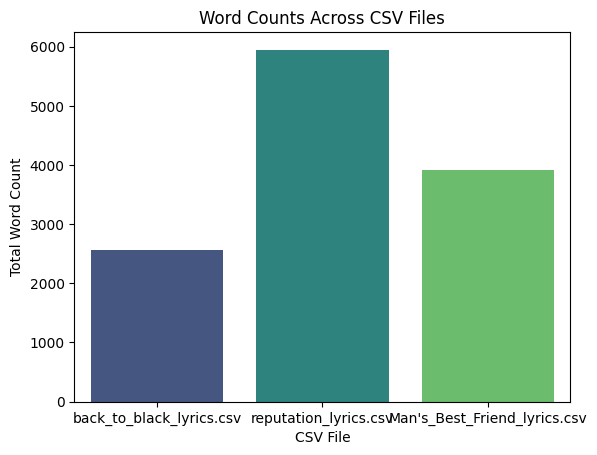

/tmp/ipython-input-3514410498.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="Frequency", y="Word", palette="mako")


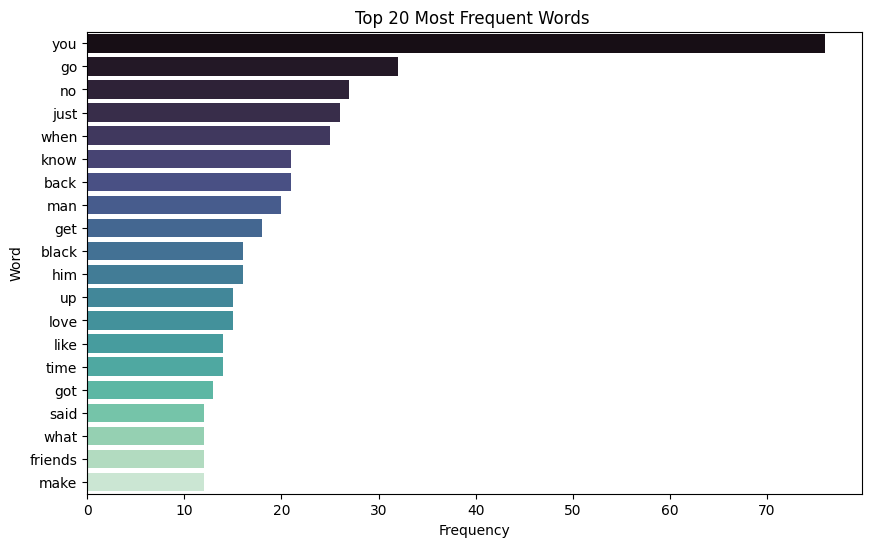

In [ ]:
#First Exploratory Graph
compare_word_counts(["/content/back_to_black_lyrics.csv", "/content/reputation_lyrics.csv", "/content/Man's_Best_Friend_lyrics.csv"])
#Second Exploratory Graph(s)
plot_frequent_words("/content/back_to_black_lyrics.csv", top_n=20)


/tmp/ipython-input-3514410498.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="Frequency", y="Word", palette="mako")


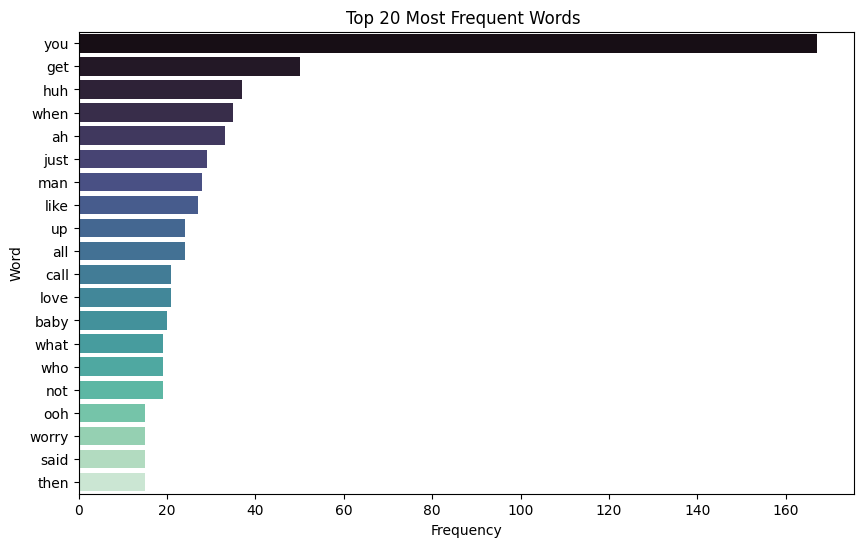

In [ ]:
plot_frequent_words("/content/Man's_Best_Friend_lyrics.csv", top_n=20)


/tmp/ipython-input-3514410498.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="Frequency", y="Word", palette="mako")


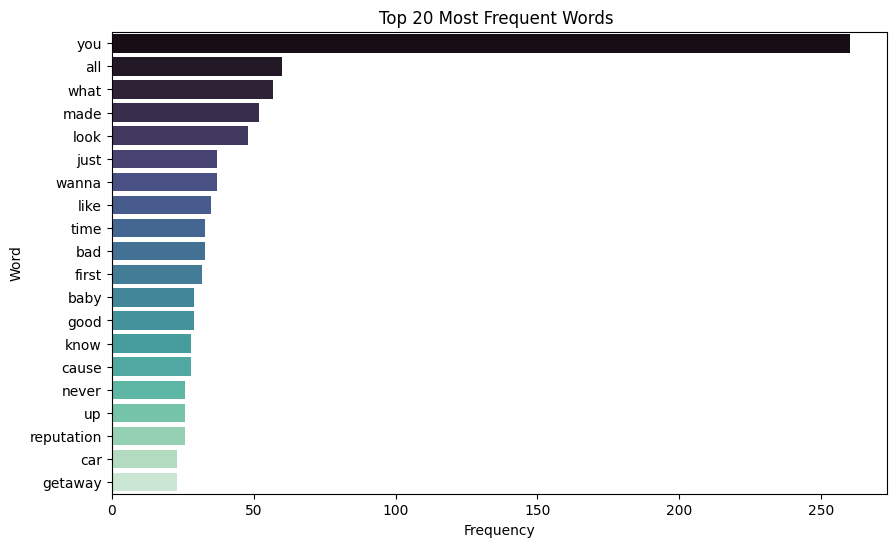

In [ ]:
plot_frequent_words("/content/reputation_lyrics.csv", top_n=20)

In [ ]:
df=pd.read_csv("/content/back_to_black_lyrics.csv")
df.head()

,artist,album,song,lyrics
0,Amy Winehouse,back_to_black,Rehab,"They tried to make me go to rehab, but I said,..."
1,Amy Winehouse,back_to_black,You Know I’m No Good,Meet you downstairs in the bar and hurt Your r...
2,Amy Winehouse,back_to_black,Me & Mr. Jones,Nobody stands in between me and my man It's me...
3,Amy Winehouse,back_to_black,Just Friends,When will we get the time to be just friends? ...
4,Amy Winehouse,back_to_black,Back to Black,He left no time to regret Kept his dick wet Wi...
